In [1]:
import os
import glob
import scipy as sp
from scipy import signal
import pandas as pd
import numpy as np
import tensorflow as tf
tf.random.set_seed(1)
import tensorflow.keras as keras
from keras import layers
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU, GaussianNoise
import time
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import itertools
from frechetdist import frdist
import random
import dffuncs as dff

In [17]:
df = pd.read_csv('./Dataset/tBLG_20-30 (raw).csv',index_col=0)

print("Successfuly loaded the dataset")
df                                          # Showing the data

Successfuly loaded the dataset


,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110
Raman_shift,,,,,,,,,,,,,,,,,,,,,
1200.0000,1.509445,1.430300,0.570610,0.544463,1.494816,0.060949,1.051168,1.330452,1.396599,0.413690,...,0.000000,0.000000,0.000000,1.777943,1.481749,1.210198,2.176134,1.236108,2.154136,1.161020
1201.3730,1.558528,1.021842,1.154354,1.329387,1.268051,1.101605,1.065533,2.693616,0.921856,1.335355,...,1.212484,1.093010,0.626173,1.540324,1.192587,2.392054,0.733202,1.346844,1.626717,1.166784
1202.7460,1.576026,1.578757,1.175561,1.830935,1.475149,0.079235,0.362773,2.057546,0.684000,0.632203,...,1.283464,0.755474,1.365398,0.974982,0.998701,1.739940,1.641450,0.978839,1.252979,2.217794
1204.1190,1.214824,1.661914,1.207713,1.657454,1.290005,0.000000,1.393959,1.793193,0.584859,0.864748,...,1.316927,0.514743,1.857452,0.794722,1.082917,1.029463,1.506366,0.449373,1.353921,2.378754
1205.4919,1.059128,1.335235,1.086381,1.384453,1.167560,0.541713,1.788148,1.623946,0.665950,1.202919,...,1.298191,0.427401,1.824834,1.039468,1.238197,0.884287,1.567246,0.647005,1.355018,1.695626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994.5081,0.867604,0.881670,0.558181,0.865719,1.298630,-0.072661,0.744055,0.385497,1.861164,0.783064,...,0.461421,1.423876,0.319264,0.000000,1.484422,1.574701,1.063128,1.393705,1.335001,0.472199
2995.8811,1.112484,0.450643,0.857795,0.659886,0.368553,0.087326,0.739759,0.711236,1.910385,1.323334,...,1.036553,1.167285,0.724019,0.902484,1.069788,1.410307,0.581849,0.788344,0.870819,0.809430
2997.2539,1.473813,0.574332,0.672116,0.213769,0.432647,0.849622,0.685509,0.694046,1.432458,0.888079,...,0.652487,1.193097,0.955260,0.762153,1.239739,1.393406,0.613717,1.062756,0.772122,0.615367


<Axes: xlabel='Raman_shift'>

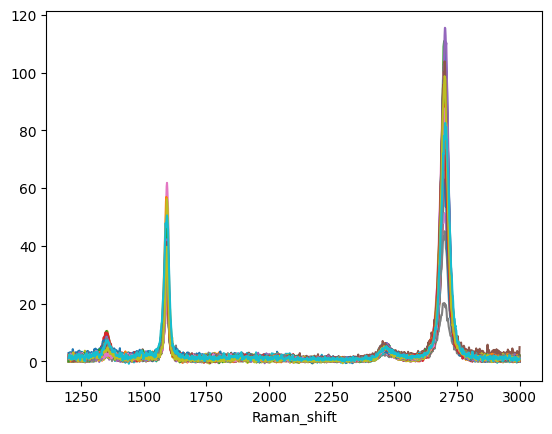

In [18]:
df.plot(legend=False)

<Axes: >

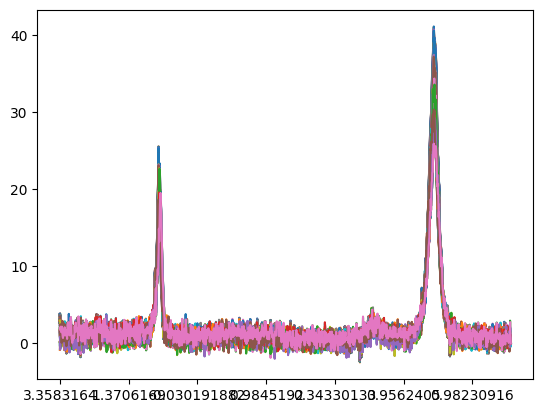

In [7]:
df1 = pd.read_csv('./20230328Data/samples1000(SLG).csv')
df1 = dff.transpose(df1)
df1.plot(legend=False)